In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context("poster")
sns.set(style="whitegrid", color_codes=True)
from pandas.tools.plotting import scatter_matrix
pd.set_option('display.max_columns', 50)

#read in data as csv
readmit = pd.read_csv('diabetic_data.csv')

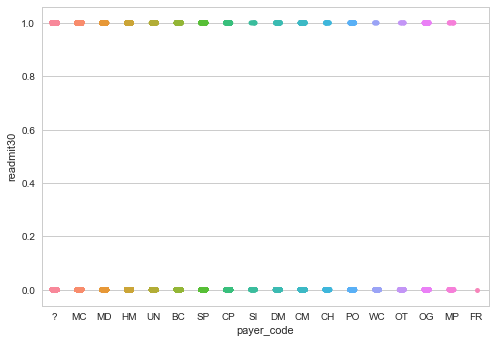

In [4]:
#cleaning data 

 #for logistic regn. and simplicity, turn readmission variable into binary (readmitted w/in 30 days or not)
readmit['readmit30'] = np.where(readmit['readmitted'] == '<30', 1, 0)

 #check for relationship b/w payer code (52% missing) and readmission
sns.stripplot(x = 'payer_code', y = 'readmit30', data = readmit, jitter = True) 

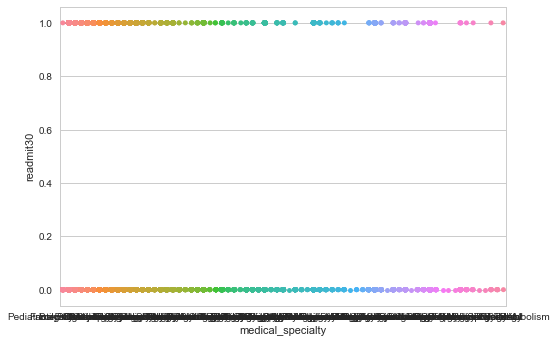

In [5]:
 #check for relationship b/w physician specialty (53% missing) and readmission
sns.stripplot(x = 'medical_specialty', y = 'readmit30', data = readmit, jitter = True) 

In [5]:
 #drop readmitted, weight (92% missing), payer code, and specialty of admitting physician 
readmit_drop = readmit.drop(['readmitted', 'weight', 'medical_specialty', 'payer_code'], axis = 1)


In [9]:
 #reduce df so that there's one (the first) encounter/patient -- use lowest encounter_id by convention
readmit_sortP = readmit_drop.sort_values(['patient_nbr', 'encounter_id'])
readmit_no_dups = readmit_sortP.drop_duplicates(['patient_nbr'])

 #remove encounters that resulted in either discharge to a hospice or patient death (need indep. observations)
readmit_discharge_clean = readmit_no_dups[((readmit_no_dups.discharge_disposition_id != 11) & 
                                          (readmit_no_dups.discharge_disposition_id != 13) &
                                          (readmit_no_dups.discharge_disposition_id != 14) & 
                                          (readmit_no_dups.discharge_disposition_id != 19) & 
                                          (readmit_no_dups.discharge_disposition_id != 20) & 
                                          (readmit_no_dups.discharge_disposition_id != 21))] 
 #check results
discharge = readmit_discharge_clean.groupby('discharge_disposition_id').size()

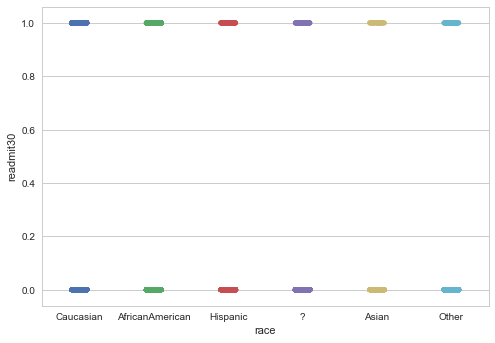

In [10]:
 #address missingness in race (3%), diagnosis 3 (<2%), and diagnosis 1 and 2 (both well below 1%)
#readmit_no_dups.groupby(['race']).size()
sns.stripplot(x = 'race', y = 'readmit30', data = readmit_discharge_clean, jitter = True) 

 #remove obs w/ missing race and diagnosis 3
readmit_full_race = readmit_discharge_clean[((readmit_discharge_clean.race != '?') & 
                                             (readmit_discharge_clean.diag_1 != '?') &
                                             (readmit_discharge_clean.diag_2 != '?') &
                                             (readmit_discharge_clean.diag_3 != '?'))]

In [11]:
 #change all remaining ?s to NaN
to_NaN = readmit_full_race.replace('?', np.NaN)
    
 #check for NaN in rows
pd.options.display.max_rows = 75
checkNA = to_NaN.isnull().sum()

 #check balance of data (6000 1's, 6000 0's) -- unbalanced 
y = to_NaN.groupby('readmit30').size()

In [147]:
#switch numeric vars to cat.? (achieves linearity between vars. and log odds)
#check for dependence/multicollinearity
#numeric vars to check: #procs, #medications, #outpatient visits, #emergency visits, #inpatient visits, #diagnoses

#notes: time in hospital (#days ranges integers 1-14)
 ##lab procs (range 1-132) -- bin?

readmit30
0    60770
1     6074
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1462d1198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x150bad128>]], dtype=object)

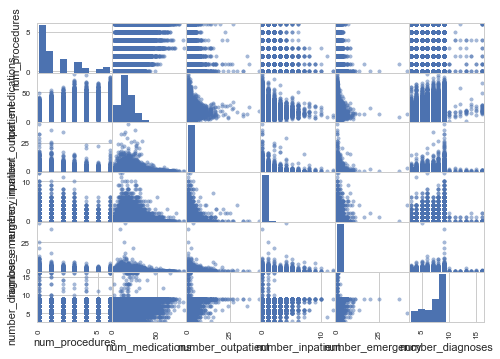

In [163]:
scatter_matrix(to_NaN[['num_procedures', 'num_medications', 'number_outpatient', 'number_inpatient',
                      'number_emergency', 'number_diagnoses']])

In [156]:
list(to_NaN)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmit30']